# ASSESSMENT 1 - COMMERCIAL BASED PROJECT
Files required:
1. `project_transactions.csv`
2. `hh_demographic.csv`
3. `product.csv`

Overall Objectives:
1. Read data from CSV files
2. Explore large datasets
3. Create new columns for assisting in analysis
4. Combine multiple DataFrames
5. Filter, sort and aggregate data to pinpoint and summarise information
6. Analyse time series with datetime fields
7. Build plots to communicate key insights
8. Optimise import workflow
9. Summary tables

___
## 1. SETUP & EXPLORATORY
1. Import libraries
2. Load data from `project_transactions.csv`
3. Specify columns to be used in the DataFrame:
    * household_key
    * BASKET_ID
    * DAY
    * PRODUCT_ID
    * QUANTITY
    * SALES_VALUE
4. Cast the datatypes as following:
    * "DAY": "Int16"
    * "QUANTITY": "Int32"
    * "PRODUCT_ID": "Int32"
5. Run .describe().round()
6. Info and memory usage check
7. Run .isna().sum() to check missing value counts
8. Overwrite the DataFrame, t to create a 'DATE' Column and drop the 'DAY' column via .assign()

In [1]:
#1-5
import pandas as pd
import numpy as np
path = "project_transactions.csv"
cols = ["household_key", "BASKET_ID", "DAY", "PRODUCT_ID", "QUANTITY", "SALES_VALUE"]
dtypes = {"DAY": "Int16", "QUANTITY": "Int32", "PRODUCT_ID": "Int32"}

t = pd.read_csv(path, usecols=cols, dtype=dtypes)
t.describe().round()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE
count,2146311.0,2.146311e+06,2146311.0,2146311.0,2146311.0,2146311.0
mean,1056.0,3.404897e+10,390.0,2884715.0,101.0,3.0
std,605.0,4.723748e+09,190.0,3831949.0,1152.0,4.0
min,1.0,2.698490e+10,1.0,25671.0,0.0,0.0
25%,548.0,3.040798e+10,229.0,917231.0,1.0,1.0
50%,1042.0,3.281176e+10,392.0,1027960.0,1.0,2.0
75%,1581.0,4.012804e+10,555.0,1132771.0,1.0,3.0
max,2099.0,4.230536e+10,711.0,18316298.0,89638.0,840.0


In [2]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  int64  
 1   BASKET_ID      int64  
 2   DAY            Int16  
 3   PRODUCT_ID     Int32  
 4   QUANTITY       Int32  
 5   SALES_VALUE    float64
dtypes: Int16(1), Int32(2), float64(1), int64(2)
memory usage: 75.7 MB


In [25]:
#6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  int64  
 1   BASKET_ID      int64  
 2   DAY            Int16  
 3   PRODUCT_ID     Int32  
 4   QUANTITY       Int32  
 5   SALES_VALUE    float64
dtypes: Int16(1), Int32(2), float64(1), int64(2)
memory usage: 75.7 MB


In [3]:
t.isna().sum()

household_key    0
BASKET_ID        0
DAY              0
PRODUCT_ID       0
QUANTITY         0
SALES_VALUE      0
dtype: int64

In [4]:
#7


household_key    0
BASKET_ID        0
DAY              0
PRODUCT_ID       0
QUANTITY         0
SALES_VALUE      0
dtype: int64

In [4]:
#8
t = t.assign(DATE = (pd.to_datetime("2016", format='%Y') + pd.to_timedelta(t["DAY"].sub(1).astype(str) + " days"))).drop(["DAY"], axis=1)

t.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,DATE
0,1364,26984896261,842930,1,2.19,2016-01-01
1,1364,26984896261,897044,1,2.99,2016-01-01
2,1364,26984896261,920955,1,3.09,2016-01-01
3,1364,26984896261,937406,1,2.50,2016-01-01
4,1364,26984896261,981760,1,0.60,2016-01-01


In [5]:
t.columns

Index(['household_key', 'BASKET_ID', 'PRODUCT_ID', 'QUANTITY', 'SALES_VALUE',
       'DATE'],
      dtype='object')

___
## 2. TIME BASED ANALYSIS
1. Question: Are sales growing over time?
    * Plot the sum of sales by month:
        * Set a date index
        * Use values from the 'SALES_VALUE' column
        * Calculate a monthly sum via .resample()
        * Plot the default line graph
2. Plot the same series for the period from 2017 January to latest:
    * Filter above plot to specified date range with row slice in .loc[]
3. Plot the sum of sales 2016 vs 2017 sales:
    * Calculate a monthly sum via .resample()
    * Create a new column 's2016' with .assign()
        * The new column 's2016' holds values of monthly sales shifted a year (12 rows/months) --> .shift(12)
4. Plot total sales by day of week:
    * Groupby those transactions via .dt.dayofweek
    * Calculate sum
    * Plot a bar chart

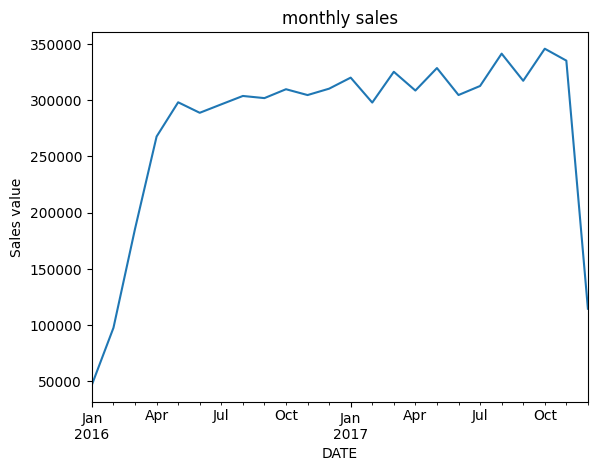

In [6]:
t_indexed = t.set_index('DATE')  
monthly_sales = t_indexed['SALES_VALUE'].resample('ME').sum()

monthly_sales.plot(
    title='monthly sales',
    xlabel='DATE',
    ylabel='Sales value'
);

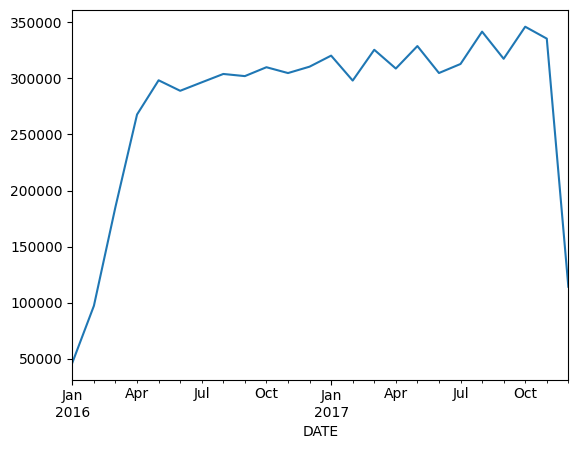

In [9]:
#1 Are sales growing over time?
# by looking at graph i can see that the sale is growing really fast from January 2016 to May 2016, 
#and then it is gradually increasing until January 2017, during 2017 the sale is fluctuated, but still growing a bit then suddenly drop in December.


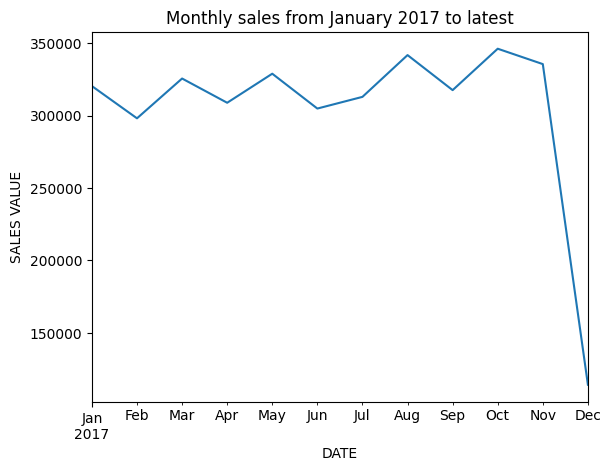

In [7]:
monthly_sales_17 = monthly_sales.loc['2017-01':]

monthly_sales_17.plot(
    title='Monthly sales from January 2017 to latest',
    xlabel='DATE',
    ylabel='SALES VALUE'
    );
# i put title and yxis for my convenience.

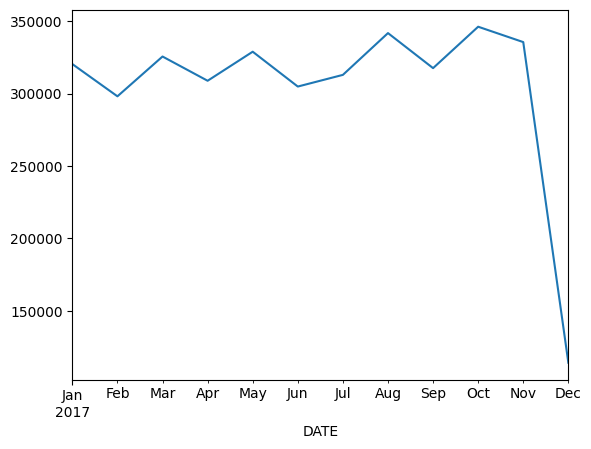

In [20]:
#2 Plot the same series for the period from 2017 January to latest



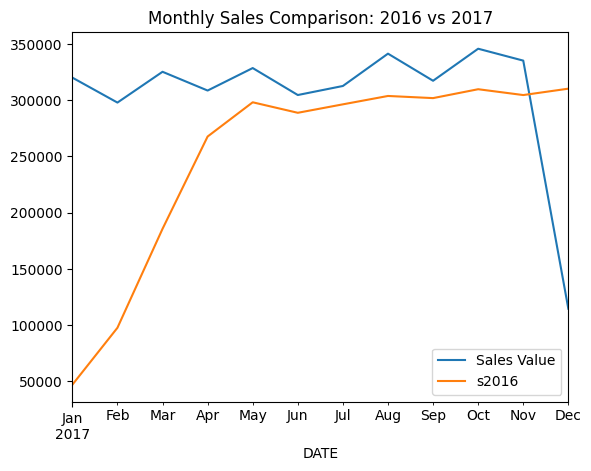

In [8]:
sales_compare = monthly_sales.to_frame(name='Sales Value')
sales_compare = sales_compare.assign(s2016=sales_compare['Sales Value'].shift(12))

sales_compare_1617 = sales_compare.loc['2017-01':'2017-12']

sales_compare_1617.plot(
    title= 'Monthly Sales Comparison: 2016 vs 2017',
    xlabel='DATE',
   
);



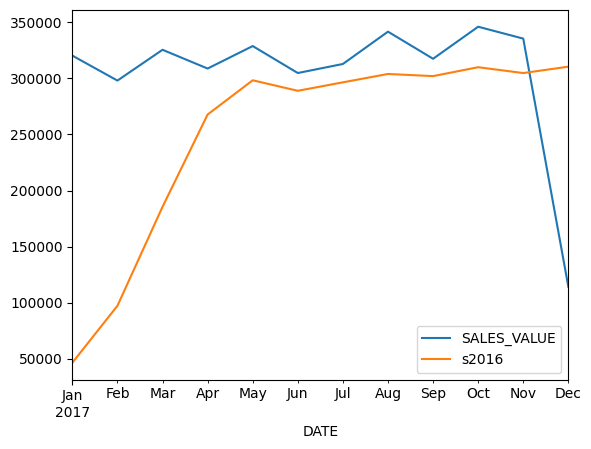

In [22]:
#3 Plot the sum of sales 2016 vs 2017 sales

# when we shift 2016 data forward 12 months, we can easily compare the sale date between 2 year
# the sales value of 2017 in general is greater than 2016


In [9]:
t.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,DATE
0,1364,26984896261,842930,1,2.19,2016-01-01
1,1364,26984896261,897044,1,2.99,2016-01-01
2,1364,26984896261,920955,1,3.09,2016-01-01
3,1364,26984896261,937406,1,2.50,2016-01-01
4,1364,26984896261,981760,1,0.60,2016-01-01


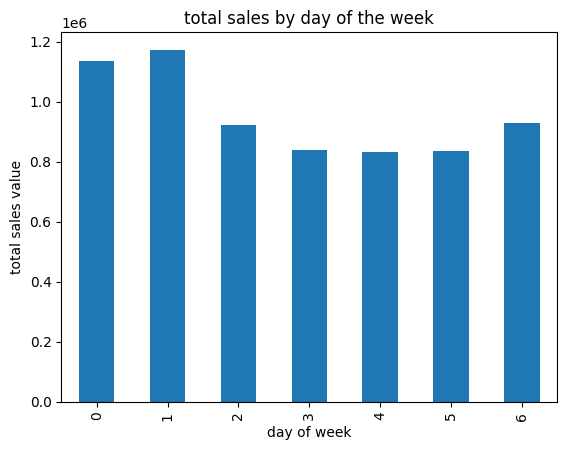

In [10]:
sales_day_of_week = t.groupby(t['DATE'].dt.dayofweek)['SALES_VALUE'].sum()


sales_day_of_week.plot(
    kind='bar',
    title = "total sales by day of the week",
    xlabel='day of week',
    ylabel='total sales value',

);

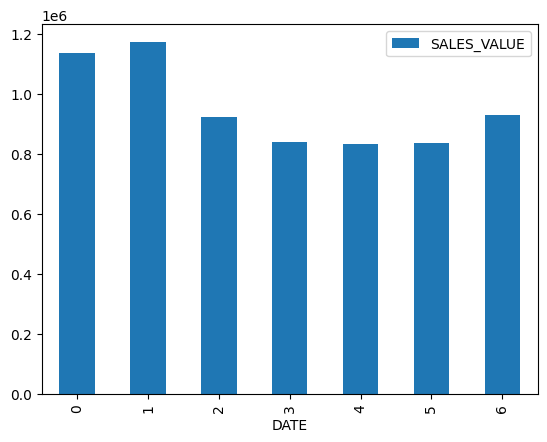

In [23]:
#4 Plot total sales by day of week
# looking at the graph the sale is higher on weekend and monday, compare to other weekday.


___
# 3. DEMOGRAPHICS
1. Load data from `hh_demographic.csv`
2. Specify columns to be used in the DataFrame:
    * AGE_DESC
    * INCOME_DESC
    * household_key
    * HH_COMP_DESC
3. Cast datatypes as following:
    * "AGE_DESC": "category"
    * "INCOME_DESC": "category"
    * "HH_COMP_DESC":"category"
4. Info and memory usage check on the DataFrame
5. Show total sales (named 'hhsales') for the household dataframe via a new column 'SALES_VALUE':
    * Groupby transactions table 't' by household_id
    * Calculate the aggregate sum of 'SALES_VALUE' by household
6. Combine household sales (hhsales) to demographics DataFrame (d) via .merge(), inner join & on household_key
    * Name the combined DataFrame as 'hhsales_d'
7. Info and memory usage check on the new DataFrame (hhsales_d)
8. Using the combined DataFrame (hhsales_d), plot a bar chart to show the aggregated sum of sales by age group
    * Note: use the parameter, observed=True within .groupby() to avoid deprecation warning
9. Using the combined DataFrame (hhsales_d), plot a bar chart to show the aggregated sum of sales by income (ordered by magnitude; descending order)
    * Note: use the parameter, observed=True within .groupby() to avoid deprecation warning
10. Question: Which of the demographics has the highest average sales? (The mean household spend by Age Description and HH Composition)
    * Create a heatmap on a pivot table by:
        * Use .pivot_table() on hhsales_d with 'AGE_DESC' as its index
        * Use 'HH_COMP_DESC' for columns
        * Find the aggregated mean for household sales
        * Use the parameter, margins=True
        * Format with a heatmap across all cells via .style.background_gradient(cmap="RdYlGn", axis=None)
11. Delete DataFrames: hhsales & hhsales_d

In [11]:
#1-3
dpath = 'hh_demographic.csv'
dcols = ["AGE_DESC", "INCOME_DESC", "household_key", "HH_COMP_DESC"]
ddtypes = {"AGE_DESC": "category", "INCOME_DESC": "category", "HH_COMP_DESC":"category"}

d = pd.read_csv(dpath, usecols=dcols, dtype=ddtypes)
d.head()

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key
0,65+,35-49K,2 Adults No Kids,1
1,45-54,50-74K,2 Adults No Kids,7
2,25-34,25-34K,2 Adults Kids,8
3,25-34,75-99K,2 Adults Kids,13
4,45-54,50-74K,Single Female,16


In [12]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   AGE_DESC       801 non-null    category
 1   INCOME_DESC    801 non-null    category
 2   HH_COMP_DESC   801 non-null    category
 3   household_key  801 non-null    int64   
dtypes: category(3), int64(1)
memory usage: 9.5 KB


In [29]:
#4



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   AGE_DESC       801 non-null    category
 1   INCOME_DESC    801 non-null    category
 2   HH_COMP_DESC   801 non-null    category
 3   household_key  801 non-null    int64   
dtypes: category(3), int64(1)
memory usage: 10.7 KB


In [13]:
hhsales=t.groupby(['household_key'], as_index=True)[['SALES_VALUE']].sum()
hhsales


,SALES_VALUE
household_key,
1,4330.16
2,1954.34
3,2653.21
4,1200.11
5,779.06
...,...
2095,3790.49
2096,1301.65
2097,8823.83


In [30]:
#5 Show total sales (named 'hhsales') for the household dataframe via a new column 'SALES_VALUE'


hhsales

,SALES_VALUE
household_key,
1,4330.16
2,1954.34
3,2653.21
4,1200.11
5,779.06
...,...
2095,3790.49
2096,1301.65
2097,8823.83


In [14]:
hhsales_d = pd.merge(d,hhsales, on='household_key', how='inner')
hhsales_d = hhsales_d[['household_key','SALES_VALUE','AGE_DESC','INCOME_DESC','HH_COMP_DESC']]
hhsales_d.head()

,household_key,SALES_VALUE,AGE_DESC,INCOME_DESC,HH_COMP_DESC
0,1,4330.16,65+,35-49K,2 Adults No Kids
1,7,3400.05,45-54,50-74K,2 Adults No Kids
2,8,5534.97,25-34,25-34K,2 Adults Kids
3,13,13190.92,25-34,75-99K,2 Adults Kids
4,16,1512.02,45-54,50-74K,Single Female


In [16]:
#6 Combine household sales (hhsales) to demographics DataFrame (d) via .merge(), inner join & on household_key


hhsales_d.head()

,household_key,SALES_VALUE,AGE_DESC,INCOME_DESC,HH_COMP_DESC
0,1,4330.16,65+,35-49K,2 Adults No Kids
1,7,3400.05,45-54,50-74K,2 Adults No Kids
2,8,5534.97,25-34,25-34K,2 Adults Kids
3,13,13190.92,25-34,75-99K,2 Adults Kids
4,16,1512.02,45-54,50-74K,Single Female


In [15]:
hhsales_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   household_key  668 non-null    int64   
 1   SALES_VALUE    668 non-null    float64 
 2   AGE_DESC       668 non-null    category
 3   INCOME_DESC    668 non-null    category
 4   HH_COMP_DESC   668 non-null    category
dtypes: category(3), float64(1), int64(1)
memory usage: 13.3 KB


In [34]:
#7 Info and memory usage check on the new DataFrame (hhsales_d)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   household_key  668 non-null    int64   
 1   SALES_VALUE    668 non-null    float64 
 2   AGE_DESC       668 non-null    category
 3   INCOME_DESC    668 non-null    category
 4   HH_COMP_DESC   668 non-null    category
dtypes: category(3), float64(1), int64(1)
memory usage: 14.5 KB


C:\Users\YẾN NHI\AppData\Local\Temp\ipykernel_28972\503811408.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = hhsales_d.groupby('AGE_DESC')['SALES_VALUE'].sum().reset_index()


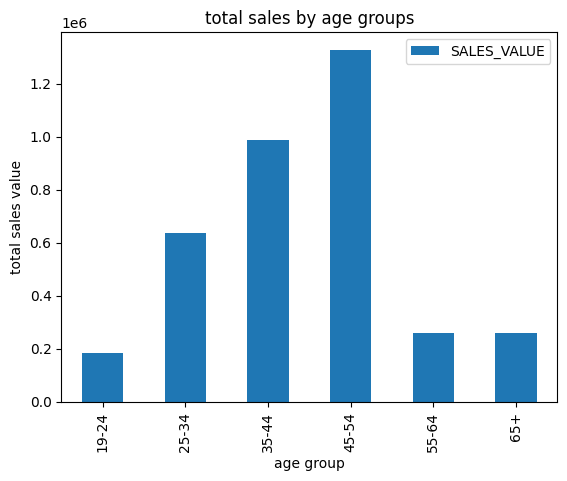

In [16]:
age_group_sales = hhsales_d.groupby('AGE_DESC')['SALES_VALUE'].sum().reset_index()
age_group_sales.set_index(age_group_sales['AGE_DESC']).plot(
    kind='bar',
    title = "total sales by age groups",
    xlabel='age group',
    ylabel='total sales value',
);


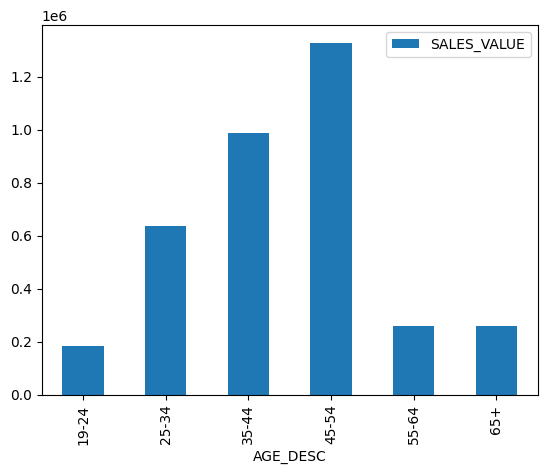

In [40]:
#8 Using the combined DataFrame (hhsales_d), plot a bar chart to show the aggregated sum of sales by age group

# through this grap, i can clearly see that the total value sales done by group of people ( 45 to 54 years old) is the largest amount,
# 2nd place goes to group(35 to 44 years old) and the least is (19 to 24 years old) group.

In [17]:
t.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,DATE
0,1364,26984896261,842930,1,2.19,2016-01-01
1,1364,26984896261,897044,1,2.99,2016-01-01
2,1364,26984896261,920955,1,3.09,2016-01-01
3,1364,26984896261,937406,1,2.50,2016-01-01
4,1364,26984896261,981760,1,0.60,2016-01-01


C:\Users\YẾN NHI\AppData\Local\Temp\ipykernel_28972\1613051743.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sale_by_income=hhsales_d.groupby('INCOME_DESC')['SALES_VALUE'].sum().reset_index()


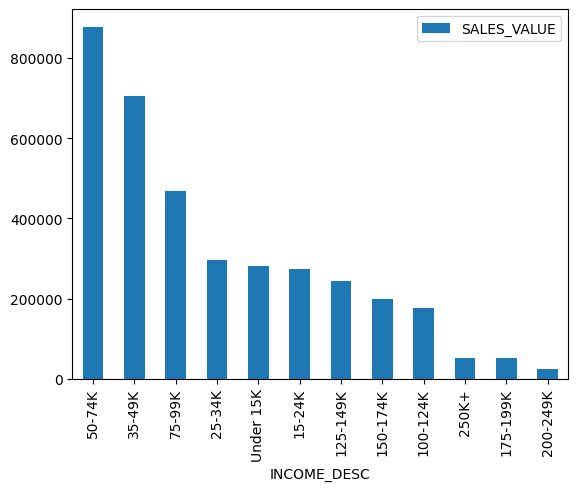

In [18]:
sale_by_income=hhsales_d.groupby('INCOME_DESC')['SALES_VALUE'].sum().reset_index()
sorted_sale = sale_by_income.sort_values(by='SALES_VALUE', ascending=False)
sorted_sale.set_index('INCOME_DESC', inplace=True)
sorted_sale.plot(
    kind='bar'
);

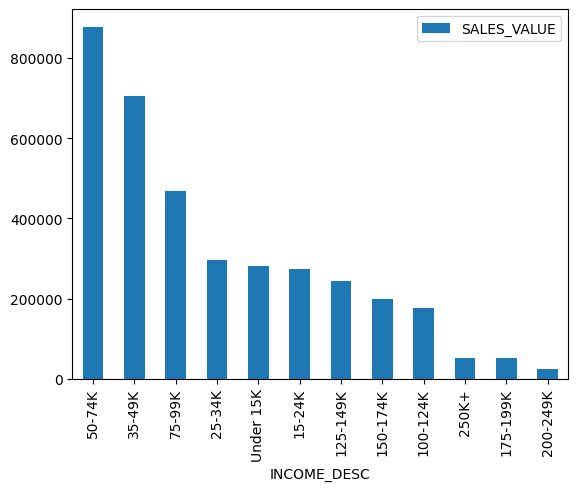

In [43]:
#9 Using the combined DataFrame (hhsales_d), plot a bar chart to show the aggregated sum of sales by income (ordered by magnitude; descending order)

# people with income in the range from 50k to 74k spent a lot of money, while the group of people with highest income ( 200-249k) spent least.

In [19]:

mean_household = hhsales_d.pivot_table(
    index='AGE_DESC',
    columns='HH_COMP_DESC', 
    values='SALES_VALUE',
    aggfunc='mean',
    margins=True,
    margins_name='All' 
).style.background_gradient(cmap='RdYlGn', axis=1);
mean_household

C:\Users\YẾN NHI\AppData\Local\Temp\ipykernel_28972\626520480.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  mean_household = hhsales_d.pivot_table(


HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown,All
AGE_DESC,,,,,,,
19-24,7268.796667,5428.945000,4020.800000,4576.095556,3216.835000,4911.275000,4692.077692
25-34,5512.196875,5753.973514,5638.515833,4807.440588,4909.522381,7356.270000,5435.517521
35-44,6297.737778,6691.772264,6260.412444,6015.192069,4844.192000,4227.691818,6090.556728
45-54,6632.569167,6610.484490,5839.527027,4549.365405,4636.637083,4843.995682,5534.879958
55-64,3064.870000,4695.655000,5752.413684,4816.148462,3922.546250,7973.750000,5168.924200
65+,4040.810000,5536.866667,4614.108571,4059.699412,3871.556000,2879.290000,4340.936500
All,6032.802143,6280.069103,5599.857756,4895.928361,4544.646750,4936.127778,5468.398743


In [48]:
#10 Question: Which of the demographics has the highest average sales? (The mean household spend by Age Description and HH Composition)

# the group with age from 35 to 44 has the highest average sales value compare to other age groups
#the group of 2 Adults Kids has the highest average sale values compare to other houshold groups

HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown,All
AGE_DESC,,,,,,,
19-24,7268.796667,5428.945000,4020.800000,4576.095556,3216.835000,4911.275000,4692.077692
25-34,5512.196875,5753.973514,5638.515833,4807.440588,4909.522381,7356.270000,5435.517521
35-44,6297.737778,6691.772264,6260.412444,6015.192069,4844.192000,4227.691818,6090.556728
45-54,6632.569167,6610.484490,5839.527027,4549.365405,4636.637083,4843.995682,5534.879958
55-64,3064.870000,4695.655000,5752.413684,4816.148462,3922.546250,7973.750000,5168.924200
65+,4040.810000,5536.866667,4614.108571,4059.699412,3871.556000,2879.290000,4340.936500
All,6032.802143,6280.069103,5599.857756,4895.928361,4544.646750,4936.127778,5468.398743


In [20]:
#11 Delete DataFrames: hhsales & hhsales_d
del hhsales
del hhsales_d


___
# 4. PRODUCT DEMOGRAPHICS
1. Load data from `product.csv`
2. Specify columns to be used in the DataFrame:
    * PRODUCT_ID
    * DEPARTMENT
3. Cast datatypes as following:
    * "PRODUCT_ID": "Int32"
    * "DEPARTMENT": "category"
4. Combine three DataFrames (t, d, p) with an inner join:
    * .merge() DataFrame 'd' on household_key
    * .merge() DataFrame 'p' on PRODUCT_ID
5. Info and memory usage check on the new DataFrame (tdp)
6. Question: Which category does the youngest demographic perform well?
    * Create a heatmap on a pivot table by:
        * Use .pivot_table() on tdp with 'DEPARTMENT' as its index
        * Use 'AGE_DESC' for columns
        * Use 'SALES_VALUE' as values
        * Find the aggregated sum of sales
        * Format with a heatmap across all cells via .style.background_gradient(cmap="RdYlGn", axis=1)

In [21]:
#1-3
ppath = 'product.csv'
pcols = ["PRODUCT_ID", "DEPARTMENT"]
pdtypes = {"PRODUCT_ID": "Int32", "DEPARTMENT": "category"}

p = pd.read_csv(ppath, usecols=pcols, dtype=pdtypes)
p.head()

,PRODUCT_ID,DEPARTMENT
0,25671,GROCERY
1,26081,MISC. TRANS.
2,26093,PASTRY
3,26190,GROCERY
4,26355,GROCERY


In [22]:
#1-3
ppath = 'product.csv'
pcols = ["PRODUCT_ID", "DEPARTMENT"]
pdtypes = {"PRODUCT_ID": "Int32", "DEPARTMENT": "category"}

p = pd.read_csv(ppath, usecols=pcols, dtype=pdtypes)
p.head()

,PRODUCT_ID,DEPARTMENT
0,25671,GROCERY
1,26081,MISC. TRANS.
2,26093,PASTRY
3,26190,GROCERY
4,26355,GROCERY


In [23]:
p.head()

,PRODUCT_ID,DEPARTMENT
0,25671,GROCERY
1,26081,MISC. TRANS.
2,26093,PASTRY
3,26190,GROCERY
4,26355,GROCERY


In [24]:
print(t.columns)
print(d.columns)
print(p.columns)

Index(['household_key', 'BASKET_ID', 'PRODUCT_ID', 'QUANTITY', 'SALES_VALUE',
       'DATE'],
      dtype='object')
Index(['AGE_DESC', 'INCOME_DESC', 'HH_COMP_DESC', 'household_key'], dtype='object')
Index(['PRODUCT_ID', 'DEPARTMENT'], dtype='object')


In [25]:
td = t.merge(d, on='household_key', how='inner')
tdp = td.merge(p, on='PRODUCT_ID', how='inner')
tdp.head()


,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,DATE,AGE_DESC,INCOME_DESC,HH_COMP_DESC,DEPARTMENT
0,1364,26984896261,842930,1,2.19,2016-01-01,65+,100-124K,Single Female,GROCERY
1,1364,26984896261,897044,1,2.99,2016-01-01,65+,100-124K,Single Female,GROCERY
2,1364,26984896261,920955,1,3.09,2016-01-01,65+,100-124K,Single Female,MEAT
3,1364,26984896261,937406,1,2.50,2016-01-01,65+,100-124K,Single Female,MEAT-PCKGD
4,1364,26984896261,981760,1,0.60,2016-01-01,65+,100-124K,Single Female,GROCERY


In [26]:
tdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161575 entries, 0 to 1161574
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   household_key  1161575 non-null  int64         
 1   BASKET_ID      1161575 non-null  int64         
 2   PRODUCT_ID     1161575 non-null  Int32         
 3   QUANTITY       1161575 non-null  Int32         
 4   SALES_VALUE    1161575 non-null  float64       
 5   DATE           1161575 non-null  datetime64[ns]
 6   AGE_DESC       1161575 non-null  category      
 7   INCOME_DESC    1161575 non-null  category      
 8   HH_COMP_DESC   1161575 non-null  category      
 9   DEPARTMENT     1161575 non-null  category      
dtypes: Int32(2), category(4), datetime64[ns](1), float64(1), int64(2)
memory usage: 51.0 MB


In [52]:
#4 Combine three DataFrames (t, d, p) with an inner join
tdp = 


tdp.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,DATE,AGE_DESC,INCOME_DESC,HH_COMP_DESC,DEPARTMENT
0,1364,26984896261,842930,1,2.19,2016-01-01,65+,100-124K,Single Female,GROCERY
1,304,27950201718,842930,1,1.67,2016-03-21,25-34,50-74K,2 Adults No Kids,GROCERY
2,575,34186568032,842930,1,1.67,2017-04-29,35-44,50-74K,Single Female,GROCERY
3,77,28023861855,842930,3,5.00,2016-03-27,35-44,100-124K,2 Adults Kids,GROCERY
4,454,42136182098,842930,1,1.67,2017-11-29,55-64,35-49K,Single Male,GROCERY


In [53]:
#5 Info and memory usage check on the new DataFrame (tdp)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161575 entries, 0 to 1161574
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   household_key  1161575 non-null  int64         
 1   BASKET_ID      1161575 non-null  int64         
 2   PRODUCT_ID     1161575 non-null  Int32         
 3   QUANTITY       1161575 non-null  Int32         
 4   SALES_VALUE    1161575 non-null  float64       
 5   DATE           1161575 non-null  datetime64[ns]
 6   AGE_DESC       1161575 non-null  category      
 7   INCOME_DESC    1161575 non-null  category      
 8   HH_COMP_DESC   1161575 non-null  category      
 9   DEPARTMENT     1161575 non-null  category      
dtypes: Int32(2), category(4), datetime64[ns](1), float64(1), int64(2)
memory usage: 51.0 MB


In [29]:
department_pivot = tdp.pivot_table(
    index='DEPARTMENT',
    columns='AGE_DESC', 
    values='SALES_VALUE',
    aggfunc='sum',
).style.background_gradient(cmap='RdYlGn', axis=1);
department_pivot

# the instruction said the axis=0, but i think it would be axis=1.

C:\Users\YẾN NHI\AppData\Local\Temp\ipykernel_28972\2312192486.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  department_pivot = tdp.pivot_table(


AGE_DESC,19-24,25-34,35-44,45-54,55-64,65+
DEPARTMENT,,,,,,
,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AUTOMOTIVE,11.640000,21.250000,72.580000,55.920000,0.000000,16.370000
CHARITABLE CONT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CHEF SHOPPE,81.300000,134.160000,348.530000,418.240000,80.860000,149.240000
CNTRL/STORE SUP,2.000000,0.000000,1.000000,9.950000,2.000000,0.100000
COSMETICS,698.630000,2273.030000,4362.020000,5187.570000,986.260000,600.900000
COUP/STR & MFG,7.490000,48.420000,121.200000,154.550000,40.680000,20.490000
DAIRY DELI,3.800000,3.850000,7.390000,16.750000,3.140000,1.940000
DELI,4043.300000,18181.940000,34577.290000,44334.220000,9850.540000,10462.330000


In [55]:
#6 Question: Which category does the youngest demographic perform well? (Answer: Alcohol)

# by looking at this graph, the youngest demographic is the the age from 19 to 24 and the category which they spend the most is grocery and meat.

AGE_DESC,19-24,25-34,35-44,45-54,55-64,65+
DEPARTMENT,,,,,,
,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AUTOMOTIVE,11.640000,21.250000,72.580000,55.920000,0.000000,16.370000
CHARITABLE CONT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CHEF SHOPPE,81.300000,134.160000,348.530000,418.240000,80.860000,149.240000
CNTRL/STORE SUP,2.000000,0.000000,1.000000,9.950000,2.000000,0.100000
COSMETICS,698.630000,2273.030000,4362.020000,5187.570000,986.260000,600.900000
COUP/STR & MFG,7.490000,48.420000,121.200000,154.550000,40.680000,20.490000
DAIRY DELI,3.800000,3.850000,7.390000,16.750000,3.140000,1.940000
DELI,4043.300000,18181.940000,34577.290000,44334.220000,9850.540000,10462.330000


___
# 5. EXPORT
Export the pivot table (tdp):
* Excel file name: **cat_sales_dg.xlsx**
* Worksheet name: **sales_pivot**

In [30]:
# Export the pivot table created from above to an excel file

department_pivot.to_excel('cat_sales_dg.xlsx', sheet_name='sales_pivot')

___